<a href="https://colab.research.google.com/github/0ahagon/Python/blob/analise_restaurante/An%C3%A1lise_restaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv('tips.csv')

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'   
}

In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [12]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [13]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [14]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [15]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [16]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
dias = {
    'Sun' : 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

In [18]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [19]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [24]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 8.7MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [25]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, numpy, matplotlib, scipy
Required-by: missingno


# Análise 1 - Valor da conta e gorjeta

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

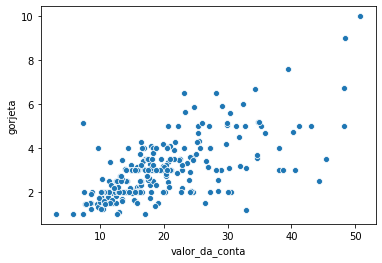

In [28]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [29]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [30]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [31]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [32]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [33]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [34]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


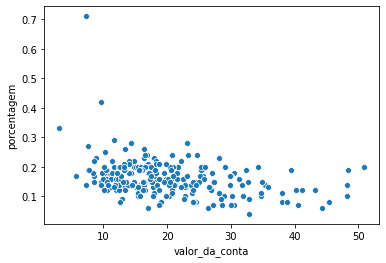

In [35]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas )

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

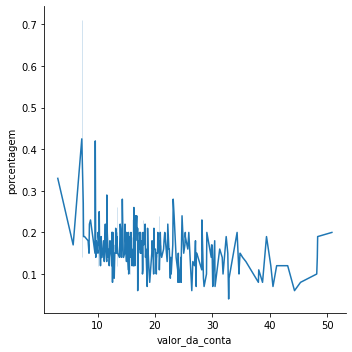

In [36]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

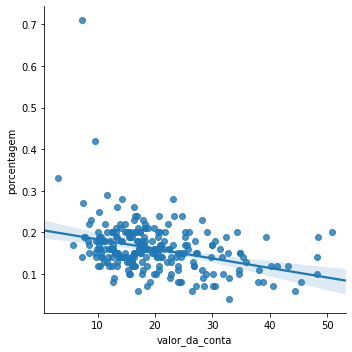

In [37]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [38]:
gorjetas.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
41,17.46,2.54,Não,Domingo,Jantar,2,0.15
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
8,15.04,1.96,Não,Domingo,Jantar,2,0.13
11,35.26,5.00,Não,Domingo,Jantar,4,0.14
5,25.29,4.71,Não,Domingo,Jantar,4,0.19


# Análise 2 - Sobremesa

## Análise descritiva

In [39]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [40]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


Podemos observar que pedir ou não sobremessa não é um determinante para *dar ou não gorjeta*

## Análise visual

Gráfico categórico

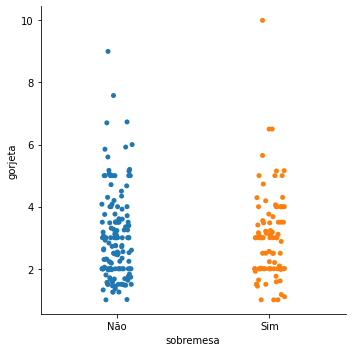

In [41]:
sns.catplot(x= 'sobremesa', y= 'gorjeta', data=gorjetas)

Não conseguimos determinar pelo gráfico acima que pedir ou não sobremesa influencia na gorjeta

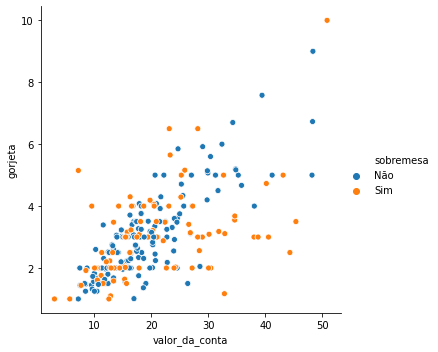

In [42]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

a distribuição de quem não deu gorjeta está mais linear enquanto de quem DEUA GORJETA mais espalhada

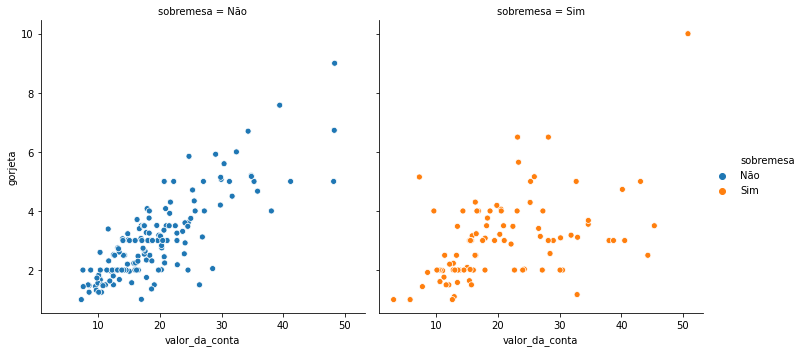

In [43]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col='sobremesa' ,data=gorjetas)

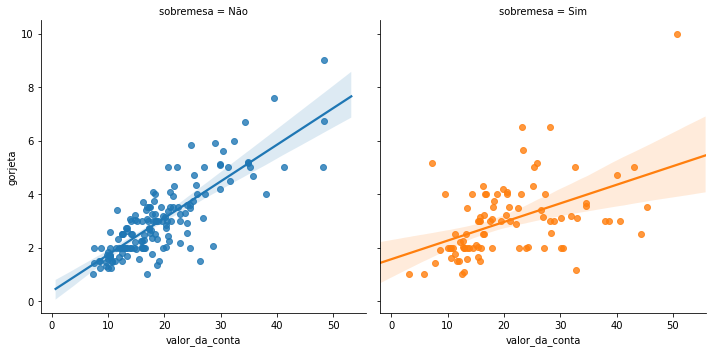

In [44]:
sns.lmplot(x='valor_da_conta', y='gorjeta',hue='sobremesa',col='sobremesa',data=gorjetas)

quando NÃO se pede sobremesa o valor da gorjeta AUMENTA conforme VALOR da conta                                                                         

Já não podemos observar o mesmo para quando SE PEDE sobremesa

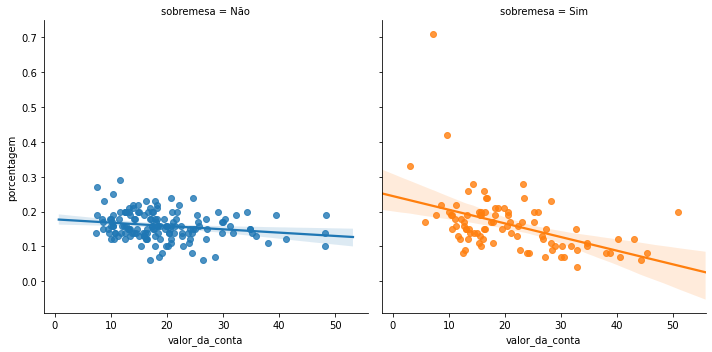

In [45]:
sns.lmplot(x='valor_da_conta', y='porcentagem',hue='sobremesa',col='sobremesa',data=gorjetas)

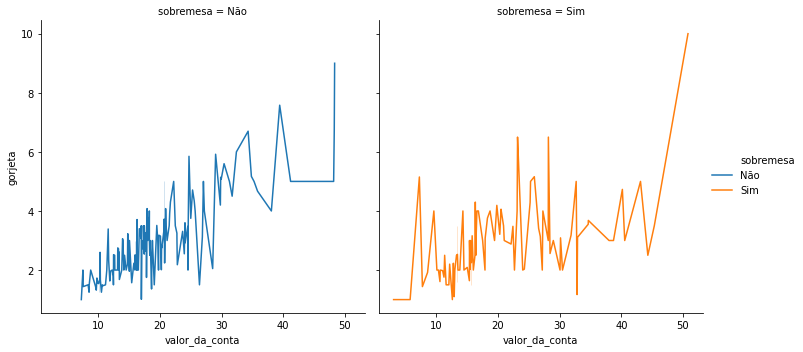

In [46]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='sobremesa',col='sobremesa',kind='line',data=gorjetas)

***Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa***

#Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos 2 grupos**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos 2 grupos**

In [47]:
from scipy.stats import ranksums

In [48]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [49]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [50]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [51]:
r = ranksums(sobremesa, sem_sobremesa)

In [52]:
print('o valor do p-value é {}'.format(r.pvalue))

o valor do p-value é 0.5266635660124415


Apesar desses dois grupos terem dado valores diferentes  de gorjeta entre aqueles que consomem e não consomem , matematicamente a diferença é insignificante

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos 2 grupos**

**O que é hipotese nula:**

para os pesquisadores, há sempre a possibilidade de que não haja efeito, ou seja, que não haja diferença entre os grupos. Esta falta de diferença é chamada de hipótese nula

A hipótese nula é verdadeira: não há diferença entre os grupos experimentais no nível da população. 

**O que são valores-P?**

 Valores-P avaliam quão bem os dados da amostra apoiam o argumento de que a hipótese nula é verdadeira. Ele mede quão compatíveis os seus dados são com a Hipótese nula. Qual é a probabilidade do efeito observado nos seus dados amostrais se a hipótese nula for verdadeira?


*   Valores-P altos: seus dados são prováveis com uma hipótese nula verdadeira.
*   Valores-P baixos: seus dados não são prováveis com uma hipótese nula verdadeira





*Um valor-P baixo sugere que sua amostra fornece evidências suficientes de que você pode rejeitar a Hipótese nula para toda a população*

O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

https://blog.minitab.com/pt/como-interpretar-corretamente-valores-p

In [53]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


#Análise dia da Semana

In [54]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

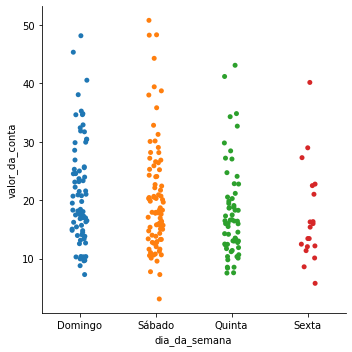

In [55]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

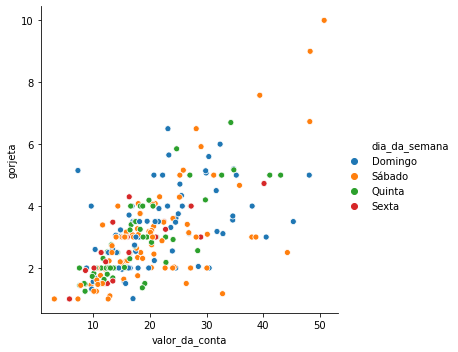

In [56]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

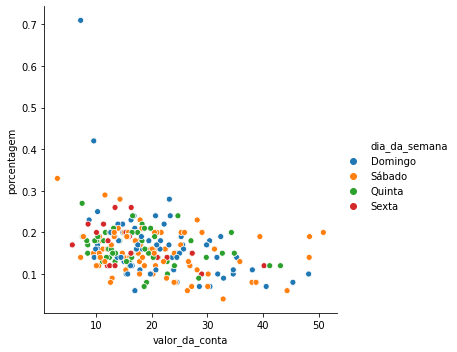

In [57]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

Separando a vizualização por dia da semana

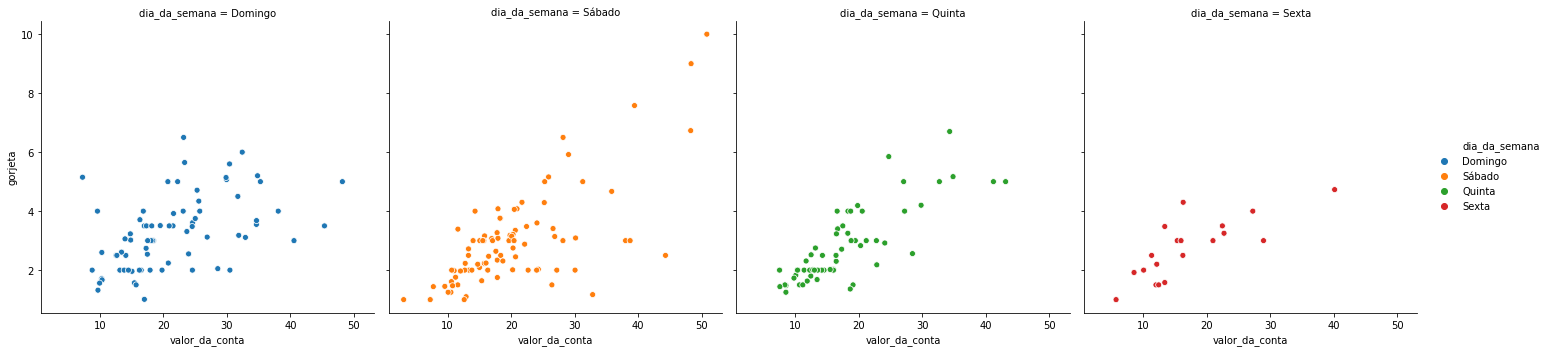

In [58]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

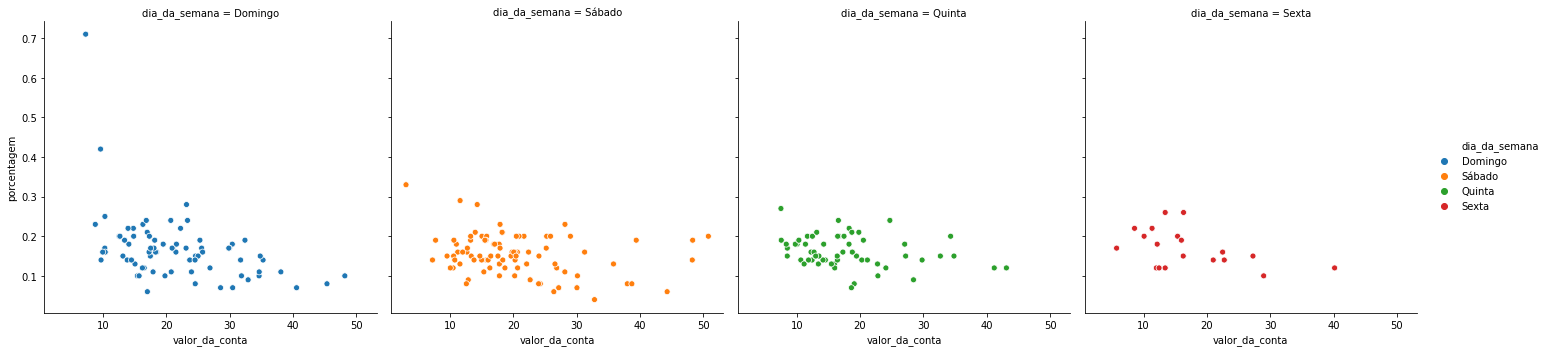

In [59]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

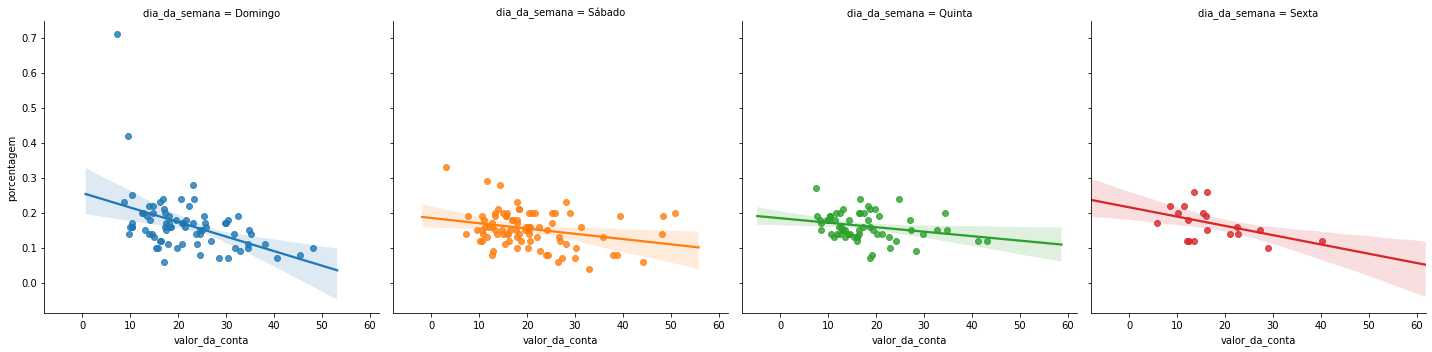

In [60]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

# Análise descritiva 

In [61]:
media_geral_gorjetas = gorjetas.gorjeta.mean() # média geral de todas as gorjetas

print('A média geral das gorjetas é de {:.2}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 3.0


In [62]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [63]:
print('frequencia')
gorjetas.dia_da_semana.value_counts()

frequencia


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

Teste de Hipotese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e domingo**

In [64]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo.sample(10)

41     17.46
172     7.25
18     16.97
160    21.50
159    16.49
112    38.07
2      21.01
164    17.51
157    25.00
113    23.95
Name: valor_da_conta, dtype: float64

In [65]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_sabado.sample(10)

29     19.65
230    24.01
75     10.51
102    44.30
216    28.15
212    48.33
56     38.01
58     11.24
229    22.12
59     48.27
Name: valor_da_conta, dtype: float64

In [66]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print('O valor do valor-p é {}'.format(r2.pvalue))

O valor do valor-p é 0.3576728477868443


Os 2 grupos são semelhantes em relação ao valor da conta

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e domingo**

In [67]:
valor_conta_quinta = gorjetas.query("dia_da_semana == 'Quinta'").valor_da_conta
valor_conta_sabado.sample(10)

227    20.45
37     16.93
56     38.01
218     7.74
209    12.76
231    15.69
215    12.90
214    28.17
228    13.28
109    14.31
Name: valor_da_conta, dtype: float64

In [68]:
r3 = ranksums(valor_conta_sabado,valor_conta_quinta)
print('O valor do valor-p é de {}'.format(r3.pvalue))

O valor do valor-p é de 0.046688533353323416


**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e na quinta**

https://www.scielo.br/pdf/jbpneu/v41n5/pt_1806-3713-jbpneu-41-05-00485.pdf

# Análise hora do dia

In [69]:
gorjetas.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
187,30.46,2.00,Sim,Domingo,Jantar,5,0.07
197,43.11,5.00,Sim,Quinta,Almoço,4,0.12
11,35.26,5.00,Não,Domingo,Jantar,4,0.14
182,45.35,3.50,Sim,Domingo,Jantar,3,0.08
88,24.71,5.85,Não,Quinta,Almoço,2,0.24


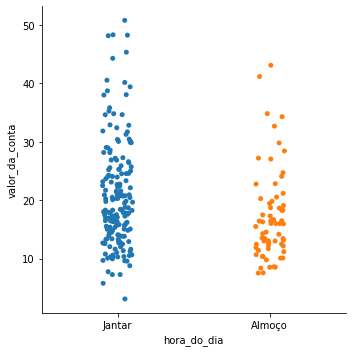

In [70]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',data=gorjetas)

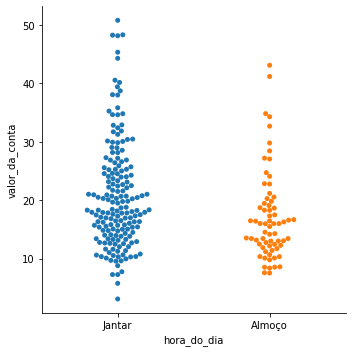

In [71]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind='swarm',data=gorjetas)

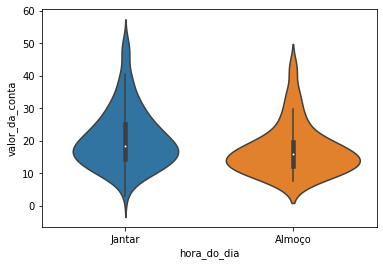

In [72]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

Temos um grupo geral maior no horario do jantar do que no horário do almoço

no horário do jantar a maior parte do grupo gastou mais entre 10 e 20

no horário do almoço temos um grupo maior se comparado ao grupo do jantar que teve seu valor da conta entre 10 e 20

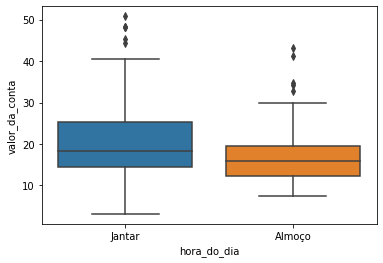

In [73]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

o valor da media da conta é diferente entre o jantar e o almoço

sendo o jantar possuindo uma média superior com relação ao horário do dia

In [74]:
valor_conta_almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
valor_conta_almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

In [75]:
valor_conta_jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
valor_conta_jantar

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: valor_da_conta, Length: 176, dtype: float64

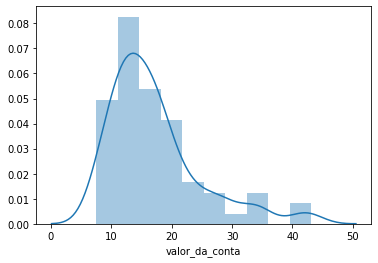

In [76]:
sns.distplot(valor_conta_almoco)

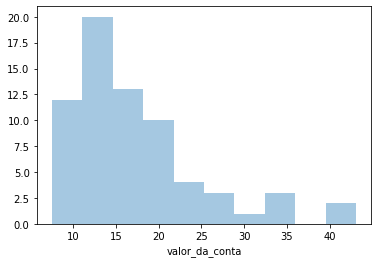

In [77]:
sns.distplot(valor_conta_almoco, kde=False)

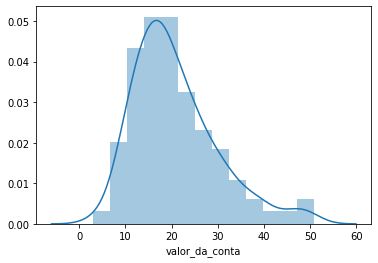

In [78]:
sns.distplot(valor_conta_jantar)

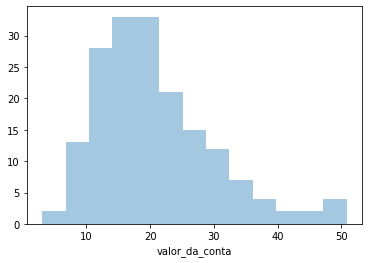

In [79]:
sns.distplot(valor_conta_jantar, kde=False)

Outras *análises*

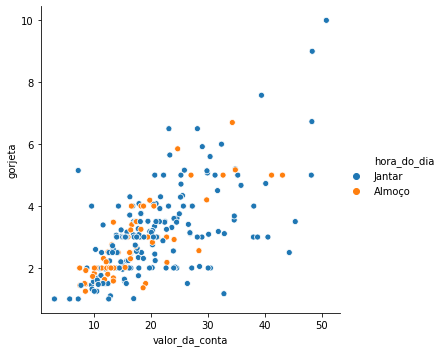

In [80]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='hora_do_dia',data=gorjetas)

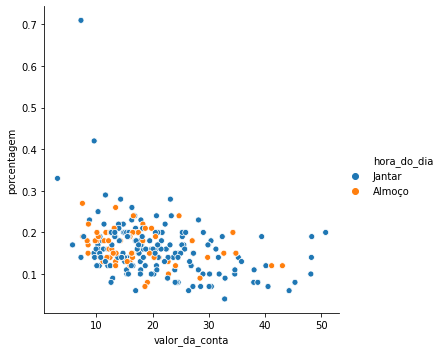

In [81]:
sns.relplot(x='valor_da_conta', y='porcentagem',hue='hora_do_dia',data=gorjetas)

Temos um declinio no valor da porcentagem conforme o valor da conta aumenta

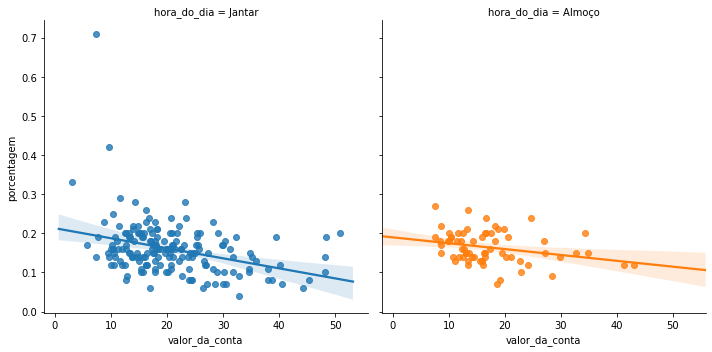

In [82]:
sns.lmplot(x='valor_da_conta', y='porcentagem',hue='hora_do_dia',col='hora_do_dia',data=gorjetas)

In [83]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [84]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [85]:
print('Frequencia no horário')
gorjetas.hora_do_dia.value_counts()

Frequencia no horário


Jantar    176
Almoço     68
Name: hora_do_dia, dtype: int64

Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [86]:
r4 = ranksums(valor_conta_almoco,valor_conta_jantar)
print('O valor do value-p é de {:.2f}'.format(r4.pvalue) )

O valor do value-p é de 0.00


**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [87]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [88]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [89]:
ranksums(porcentagem_jantar,porcentagem_almoco)

RanksumsResult(statistic=-1.1258018532735787, pvalue=0.2602493995587126)

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual ou parecida no jantar e no almoço**